# <center> APE </center> #

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sys
from scipy.interpolate import interp1d
from scipy import interpolate
from numba import autojit
from pylab import *
from matplotlib import gridspec
import netCDF4
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from useful import *
import SG as SG
import layers_calc_numba
import APE_Calc as AC
from Flat_channel import *
from HB_Plot import nf, fmt
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline

ImportError: /noc/packages/linux_emt64/gcc/v4.3.1/lib64/libstdc++.so.6: version `GLIBCXX_3.4.11' not found (required by /noc/users/hb1g13/.conda/envs/SLED/lib/python2.7/site-packages/matplotlib/_contour.so)

In [2]:
# Some parameters
Full = 'N'  # 9 Pannels isn't ideal for presentations N option give 4 plots
Qplot = 'Y'

In [3]:
if Full == 'N':
    tau = ['3', '300', '3000', 'Closed']
elif Full == 'Extremes':
    tau = ['3','Closed']
else:
    tau = ['3', '10', '30', '100', '300',
           '1000', '3000', '10000', 'Closed']
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis/Full'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'/VSQ.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs=np.array(runs)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: RuntimeWarning: invalid value encountered in divide


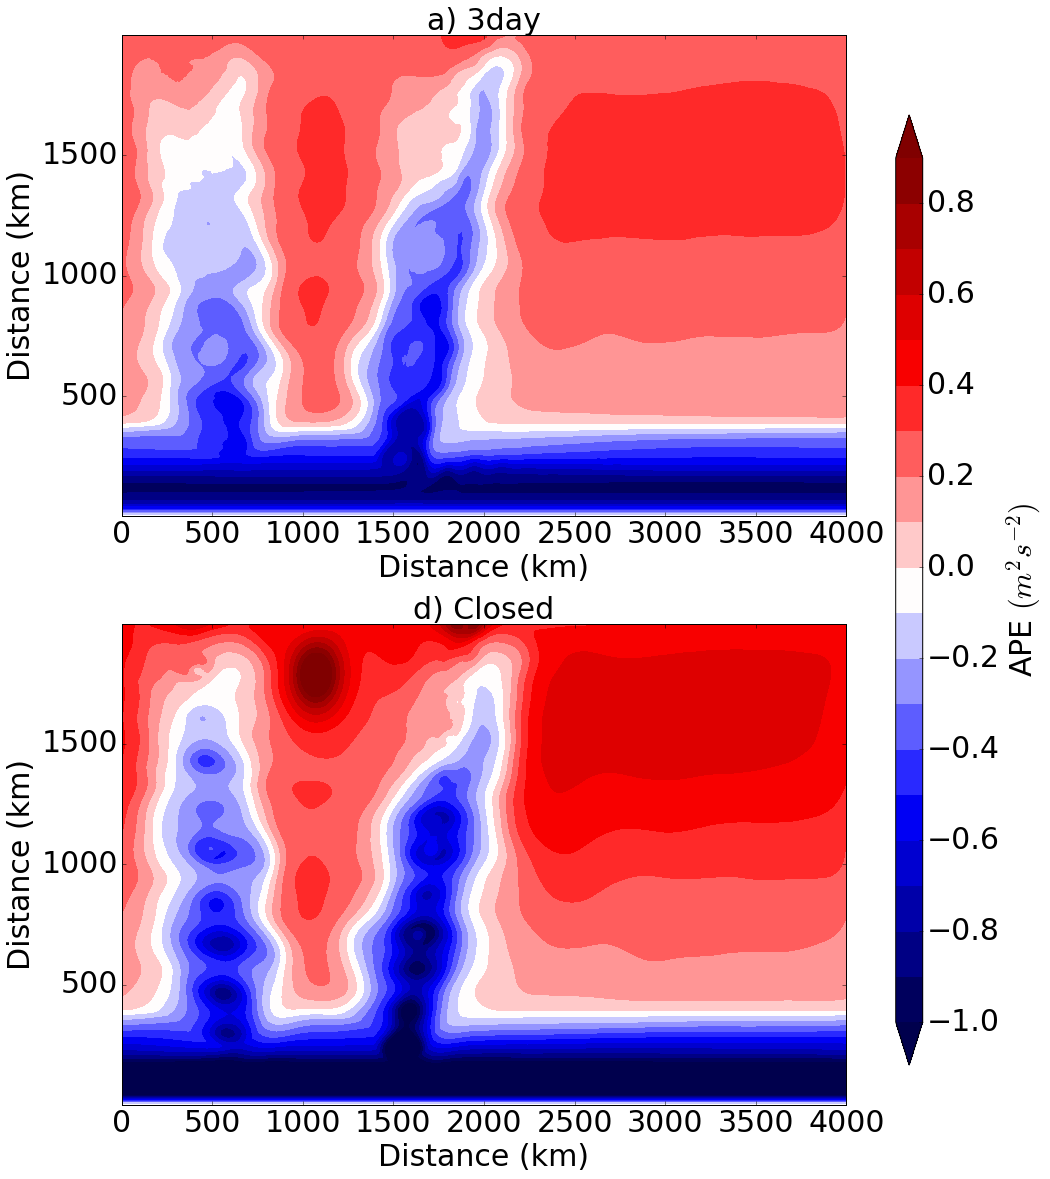

In [9]:
fig = plt.figure(figsize=(12.5, 16.5))
APEt = []
EKEt = []
# Create Panels
Psi_levs = np.arange(-1., 1., .1)
Psi_ticks =np.arange(-1., 1., .1)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]]+'/')
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    g = AC.APEcomputer(c)
    APE = g.calc_APE()
    APEt.append(np.mean(APE))
    CellVol = 5000*np.tile(c.dzf,(c.Ny,1)).T
    EKEt.append(np.mean(c.calc_EKE()*CellVol))
    ax = fig.add_subplot(2, 1, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.xc/1000, c.yc/1000,
                (APE/(c.Lx*c.Ly*c.Depth))*10**5, Psi_levs,cmap=cm.seismic, extend='both')
    
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Distance (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('APE $(m^2s^{-2})$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)
 
 

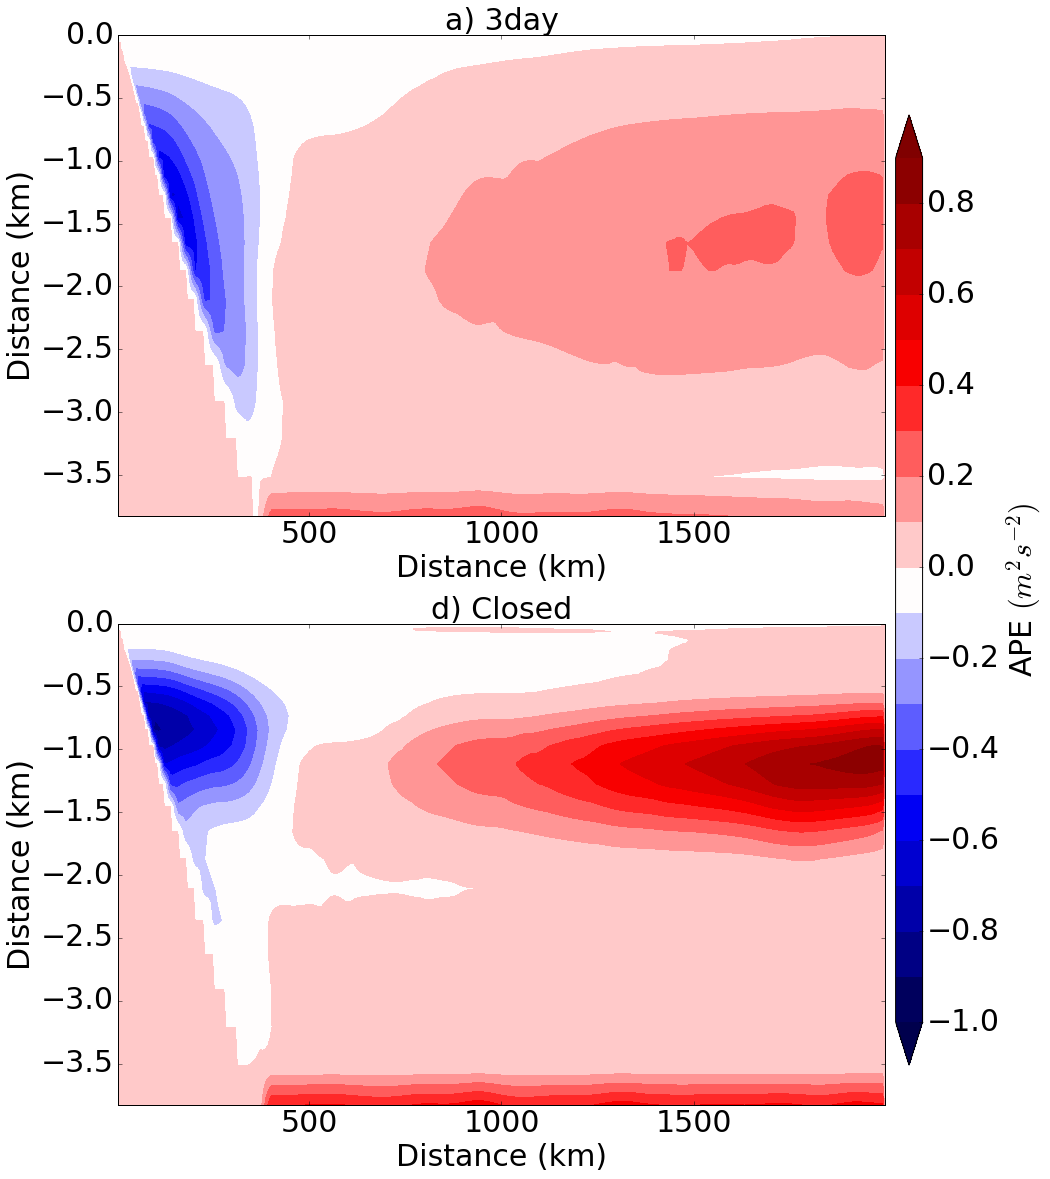

In [17]:
fig = plt.figure(figsize=(12.5, 16.5))
APEt = []
EKEt = []
# Create Panels
Psi_levs = np.arange(-1., 1., .1)
Psi_ticks =np.arange(-1., 1., .1)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]]+'/')
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    g = AC.APEcomputer(c)
    APE = g.calc_APE_3d().mean(axis=2)
    APEt.append(np.mean(APE))
    CellVol = 5000*np.tile(c.dzf,(c.Ny,1)).T
    EKEt.append(np.mean(c.calc_EKE()*CellVol))
    ax = fig.add_subplot(2, 1, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
                (APE/(5000*5000*1000)),Psi_levs,cmap=plt.cm.seismic, extend='both')
    
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Distance (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('APE $(m^2s^{-2})$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)